In [1]:

import random


import numpy as np

class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        result_test = []
        if test_data: 
            n_test = len(test_data)
            result_test.append(self.evaluate(test_data)/n_test)
        n = len(training_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                result_test.append(self.evaluate(test_data)/n_test)
                print ("Epoch {0}: {1:.4f}".format(
                    j, result_test[j]))
            else:
                print ("Epoch {0} complete".format(j))
        return result_test

    def update_mini_batch(self, mini_batch, eta):
        """Обновление весов и смещений нейронной сети."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Вычисляет градиент функции стоимости для каждого слоя."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] 
        zs = [] 
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Возвращает точность нейронной сети."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Возвращает частичные производные выходного слоя фунцкции стоимости."""
        return (output_activations-y)
 
    def sigmoid(z):
    """Сигмоидная функция."""
    return 1.0/(1.0+np.exp(-z))

    def sigmoid_prime(z):
    """Производная сигмоидной функции."""
    return sigmoid(z)*(1-sigmoid(z))

In [2]:
import matplotlib.pyplot as plt
def show_image(image_arr, label, pred):  
    image = [int(i) for i in image_arr*255]
    pixels = np.array(image, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plt.title('Label is {label}. Predict is {pred}'.format(label=label, pred = pred))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [3]:
import mnist_loader

In [4]:
training, test = mnist_loader.load_data_normalize()

In [12]:
result_inner_layer = []
for i in range(0,30,3):
    net = Network([784, i, 10])
    net.SGD(training, 5, 30, 3.0)
    result_inner_layer.append(net.evaluate(test)/len(test))
    print("Step {0} - Count neuron {1} - result {2}".format(i//3, i, result_inner_layer[i//3]))

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 0 - Count neuron 0 - result 0.1135
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 1 - Count neuron 3 - result 0.299
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 2 - Count neuron 6 - result 0.8463
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 3 - Count neuron 9 - result 0.8914
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 4 - Count neuron 12 - result 0.9041
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 5 - Count neuron 15 - result 0.9155
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 6 - Count neuron 18 - result 0.922
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 7 - Count neuron 21 - result 0.924

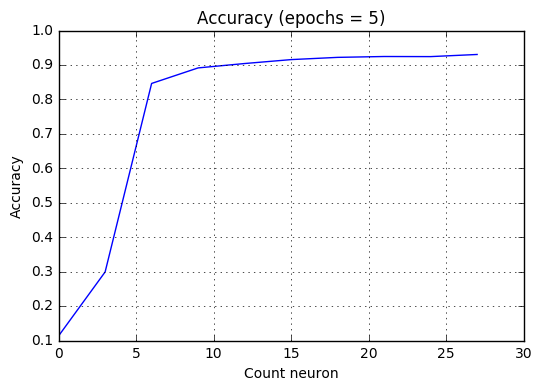

In [24]:
x = np.arange(0,30,3)
plt.plot(x,result_inner_layer)
plt.xlabel("Count neuron")
plt.ylabel("Accuracy")
plt.title("Accuracy (epochs = 5)")
plt.grid(True)
plt.savefig('inner_neuron.png', format='png')
plt.show()


In [25]:
net = Network([784, 15, 10])
result_count_epoch = net.SGD(training, 30, 30, 3.0, test_data = test)

Epoch 0: 0.8674
Epoch 1: 0.8983
Epoch 2: 0.9073
Epoch 3: 0.9152
Epoch 4: 0.9159
Epoch 5: 0.9187
Epoch 6: 0.9197
Epoch 7: 0.9224
Epoch 8: 0.9279
Epoch 9: 0.9262
Epoch 10: 0.9295
Epoch 11: 0.9270
Epoch 12: 0.9305
Epoch 13: 0.9308
Epoch 14: 0.9315
Epoch 15: 0.9312
Epoch 16: 0.9334
Epoch 17: 0.9345
Epoch 18: 0.9343
Epoch 19: 0.9346
Epoch 20: 0.9358
Epoch 21: 0.9352
Epoch 22: 0.9334
Epoch 23: 0.9361
Epoch 24: 0.9354
Epoch 25: 0.9358
Epoch 26: 0.9376
Epoch 27: 0.9373
Epoch 28: 0.9345
Epoch 29: 0.9390


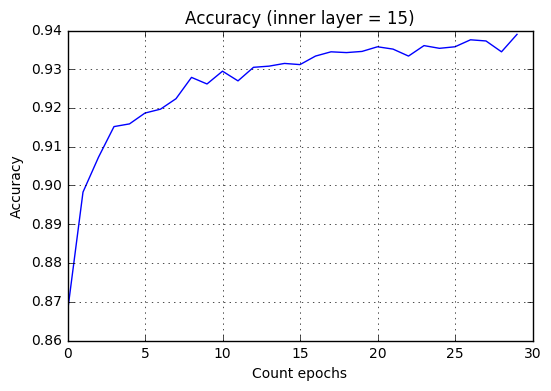

In [26]:
x = np.arange(0,30)
plt.plot(x,result_count_epoch)
plt.xlabel("Count epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy (inner layer = 15)")
plt.grid(True)
plt.savefig('epochs.png', format='png')
plt.show()

In [78]:
result_size_epochs = []
for i in range(3,30,3):
    net = Network([784, 15, 10])
    net.SGD(training, 5, i, 3.0)
    result_size_epochs.append(net.evaluate(test)/len(test))
    print("Step {0} - Size epoch {1} - result {2}".format(i//3, i, result_size_epochs[(i-3)//3]))

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 1 - Size epoch 3 - result 0.9002
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 2 - Size epoch 6 - result 0.9162
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 3 - Size epoch 9 - result 0.9204
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 4 - Size epoch 12 - result 0.9302
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 5 - Size epoch 15 - result 0.9172
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 6 - Size epoch 18 - result 0.9188
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 7 - Size epoch 21 - result 0.915
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Step 8 - Size epoch 24 - result 0.9199
Epoch 0 comp

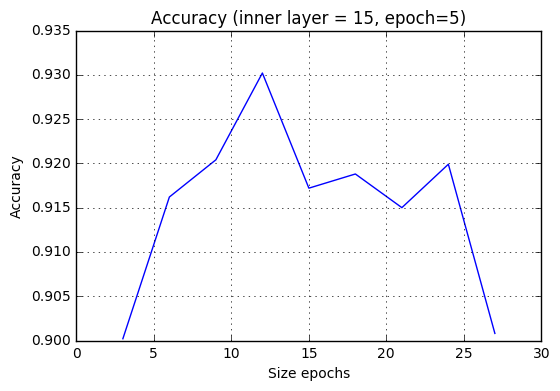

In [79]:
x = np.arange(3,30,3)
plt.plot(x,result_size_epochs)
plt.xlabel("Size epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy (inner layer = 15, epoch=5)")
plt.grid(True)
plt.savefig('size_epochs.png', format='png')
plt.show()

In [37]:
result_speed = []
for i in [0.01, 0.1, 1, 3, 5, 10, 20]:
    net = Network([784, 15, 10])
    net.SGD(training, 5, 30, i)
    result_speed.append(net.evaluate(test)/len(test))

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete


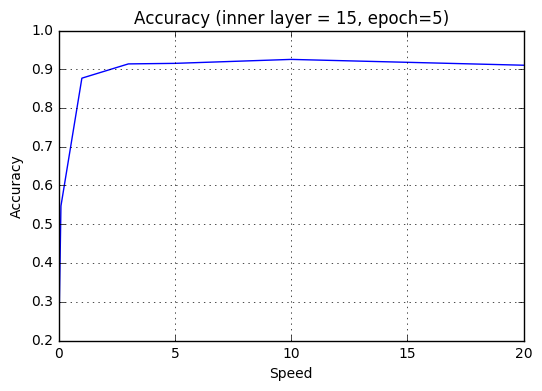

In [38]:
x = [0.01, 0.1, 1, 3, 5, 10, 20]
plt.plot(x,result_speed)
plt.xlabel("Speed")
plt.ylabel("Accuracy")
plt.title("Accuracy (inner layer = 15, epoch=5)")
plt.grid(True)
plt.savefig('speed.png', format='png')
plt.show()

In [42]:
net = Network([784, 15, 10])
net.SGD(training, 30, 30, 3.0, test_data = test)

Epoch 0: 0.8681
Epoch 1: 0.9003
Epoch 2: 0.9087
Epoch 3: 0.9142
Epoch 4: 0.9133
Epoch 5: 0.9209
Epoch 6: 0.9204
Epoch 7: 0.9227
Epoch 8: 0.9268
Epoch 9: 0.9288
Epoch 10: 0.9286
Epoch 11: 0.9272
Epoch 12: 0.9301
Epoch 13: 0.9307
Epoch 14: 0.9267
Epoch 15: 0.9293
Epoch 16: 0.9322
Epoch 17: 0.9323
Epoch 18: 0.9334
Epoch 19: 0.9305
Epoch 20: 0.9306
Epoch 21: 0.9323
Epoch 22: 0.9323
Epoch 23: 0.9334
Epoch 24: 0.9322
Epoch 25: 0.9341
Epoch 26: 0.9331
Epoch 27: 0.9314
Epoch 28: 0.9351
Epoch 29: 0.9344


[0.8681,
 0.9003,
 0.9087,
 0.9142,
 0.9133,
 0.9209,
 0.9204,
 0.9227,
 0.9268,
 0.9288,
 0.9286,
 0.9272,
 0.9301,
 0.9307,
 0.9267,
 0.9293,
 0.9322,
 0.9323,
 0.9334,
 0.9305,
 0.9306,
 0.9323,
 0.9323,
 0.9334,
 0.9322,
 0.9341,
 0.9331,
 0.9314,
 0.9351,
 0.9344]

In [43]:
result = np.zeros(10)
for i in test:
    if np.argmax(net.feedforward(i[0])) != i[1]:
        result[int(i[1])] +=1
print(result)

[  32.   25.   89.   77.   41.  110.   58.   54.   87.   83.]


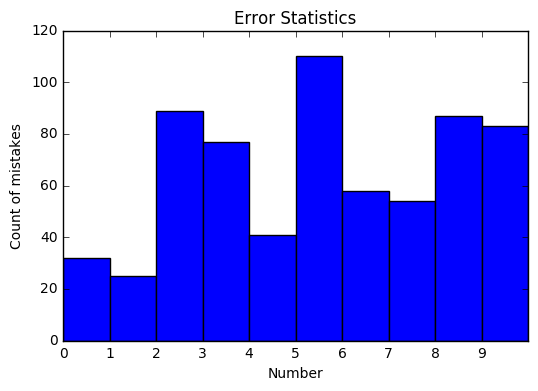

In [54]:
plt.bar(range(0,10), result, 1)
plt.xticks(range(0,10))
plt.xlabel("Number")
plt.ylabel("Count of mistakes")
plt.title("Error Statistics")
plt.savefig('error.png', format='png')
plt.show()

In [66]:
def vect_to_int(vect):
    for i in range(10):
        if(vect[i] == 1.0):
            return i
train_test = []
for i in training:
    train_test.append([i[0], vect_to_int(i[1])])
print("Training data: {0:.4f}".format(net.evaluate(train_test)/len(train_test)))
print("Test data: {0:.4f}".format(net.evaluate(test)/len(test)))

Training data: 0.9473
Test data: 0.9344


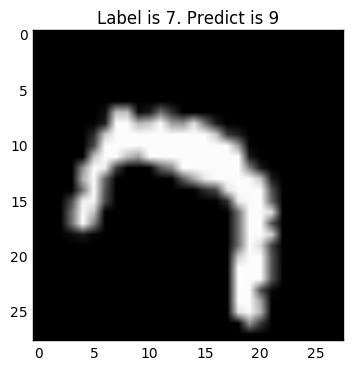

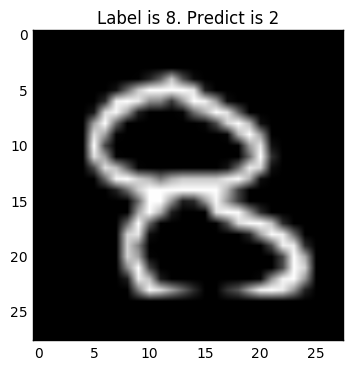

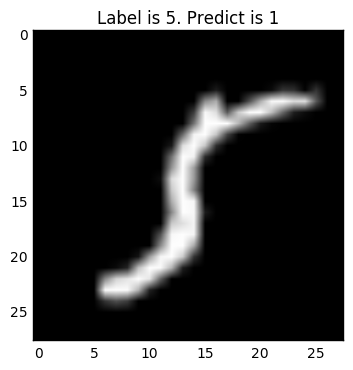

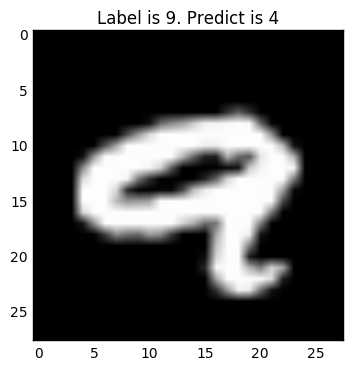

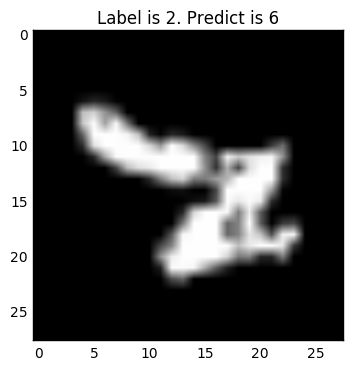

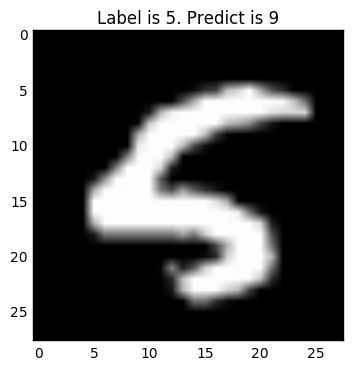

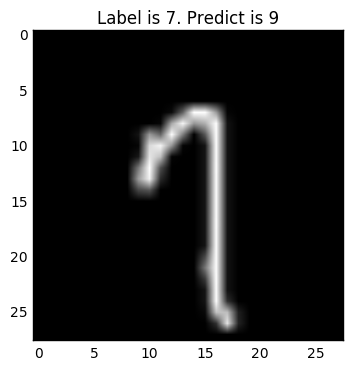

Result: 9344 / 10000


In [77]:
for i in range(4100,4200):
    if(test[i][1] != np.argmax(net.feedforward(test[i][0]))):
        show_image(test[i][0],test[i][1], np.argmax(net.feedforward(test[i][0])))
print("Result: {0} / {1}".format( net.evaluate(test), len(test)))

In [90]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_train, y_train)
print("Правильность: {:.2f}".format(clf.score(x_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [2]:
training_inputs, training_target, test_inputs, test_target = mnist_loader.load_data()